In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train_loan.csv')
test = pd.read_csv('test_loan.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()


In [4]:
print(train.describe())
print(train.shape)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
(614, 13)


In [5]:
print (train.head(20))

     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001002    Male      No          0      Graduate            No   
1   LP001003    Male     Yes          1      Graduate            No   
2   LP001005    Male     Yes          0      Graduate           Yes   
3   LP001006    Male     Yes          0  Not Graduate            No   
4   LP001008    Male      No          0      Graduate            No   
5   LP001011    Male     Yes          2      Graduate           Yes   
6   LP001013    Male     Yes          0  Not Graduate            No   
7   LP001014    Male     Yes         3+      Graduate            No   
8   LP001018    Male     Yes          2      Graduate            No   
9   LP001020    Male     Yes          1      Graduate            No   
10  LP001024    Male     Yes          2      Graduate            No   
11  LP001027    Male     Yes          2      Graduate           NaN   
12  LP001028    Male     Yes          2      Graduate            No   
13  LP

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


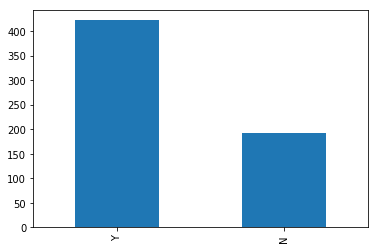

In [6]:
#PLOTTING TARGET VARIABLE

print(train['Loan_Status'].value_counts())

print (train['Loan_Status'].value_counts(normalize=True))

train['Loan_Status'].value_counts().plot.bar()

In [7]:
#INFERENCE : FOR 69% of the people, loan was approved.

In [8]:
#PLOTTING INDEPENDENT VARIABLES THAT ARE CATEGORICAL


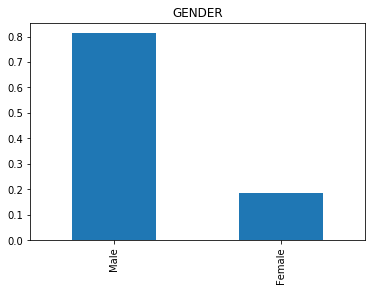

In [9]:

train['Gender'].value_counts(normalize=True).plot.bar(title='GENDER')

In [10]:

#INFERENCE : 80% of applicants are male

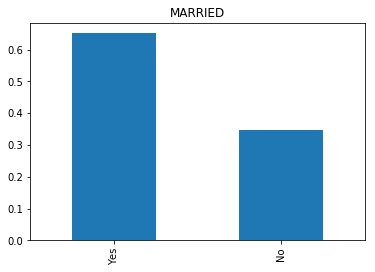

In [11]:
train['Married'].value_counts(normalize=True).plot.bar(title='MARRIED')

In [12]:
#INFERENCE : 65% are married

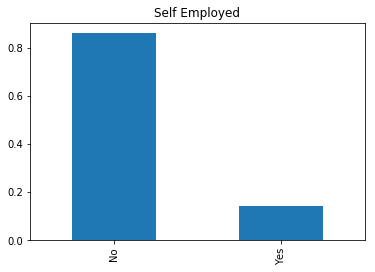

In [13]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

In [14]:
#INFERENCE : 15% are self employed

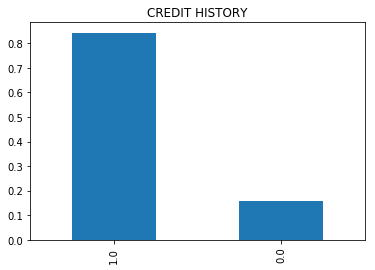

In [15]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='CREDIT HISTORY')

In [16]:
#INFERENCE : 85% have replayed their debts

In [17]:
#PLOTTING INDEPENDENT VARIABLES THAT ARE ORDINAL


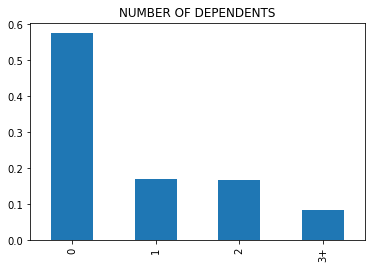

In [18]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='NUMBER OF DEPENDENTS')

In [19]:
# INFERENCE : almost 60% dont have any dependents

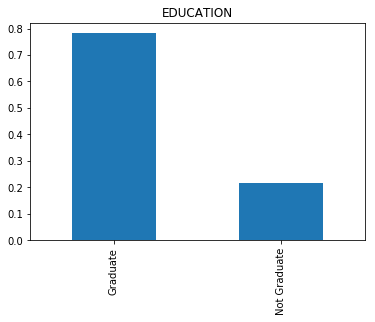

In [20]:
train['Education'].value_counts(normalize=True).plot.bar(title='EDUCATION')

In [21]:
#INFERENCE : 80% are graduates

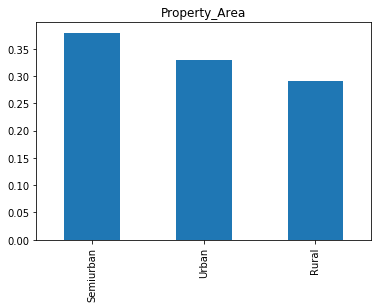

In [22]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

In [23]:
#INFERENCE : Most are from semi urban areas.


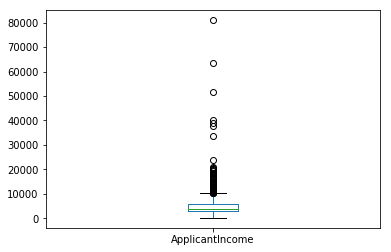

In [24]:
train['ApplicantIncome'].plot.box()

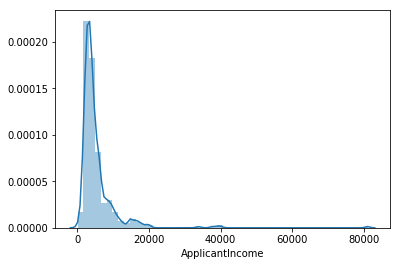

In [25]:
dfff=train.dropna()
sns.distplot(dfff['ApplicantIncome'])

In [26]:
#INFERENCE: boxplot confirms the presence of a lot of outliers/extreme values.
# This can be attributed to the income disparity in the society.
# Part of this can be driven by the fact that we are looking at people with different education levels.

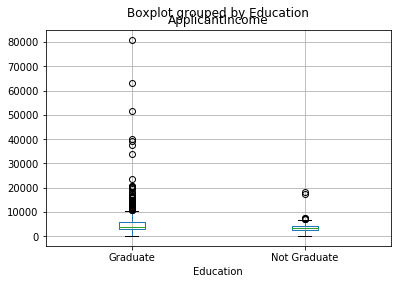

In [27]:
train.boxplot(column='ApplicantIncome', by='Education')

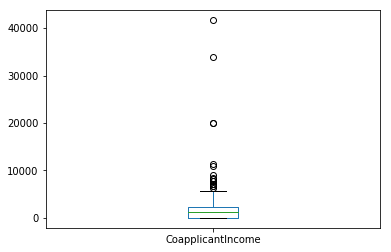

In [28]:
#co-applicant income

train['CoapplicantIncome'].plot.box()

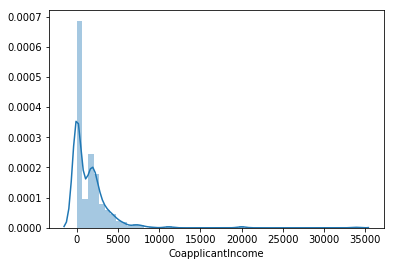

In [29]:
dff=train.dropna()
sns.distplot(dff['CoapplicantIncome'])

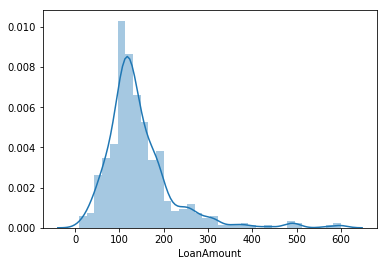

In [30]:
df=train.dropna()
sns.distplot(df['LoanAmount'])

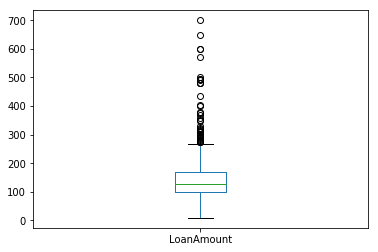

In [31]:
train['LoanAmount'].plot.box()

In [32]:
#BIVARIATE ANALYSIS

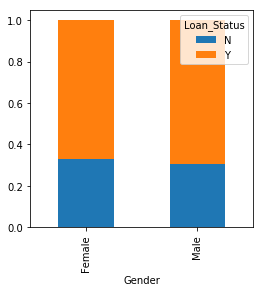

In [33]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

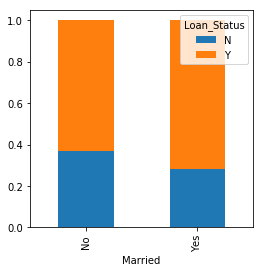

In [34]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

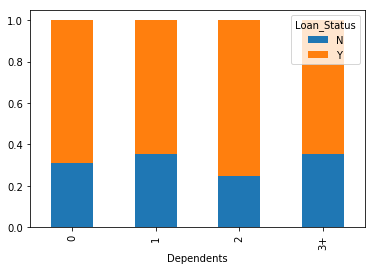

In [35]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

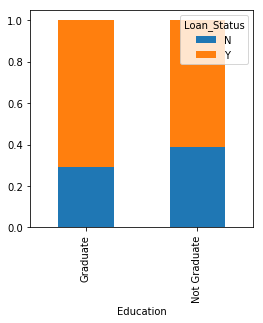

In [36]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

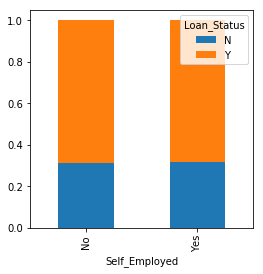

In [37]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [38]:
#Proportion of married applicants is higher for the approved loans.
#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#There is nothing significant we can infer from Self_Employed vs Loan_Status plot.


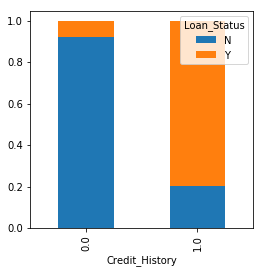

In [39]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


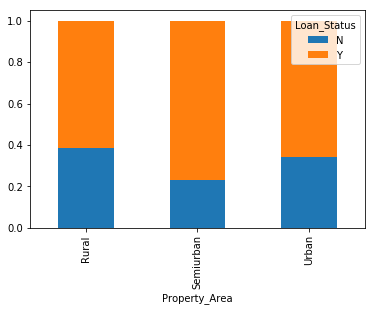

In [41]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


In [42]:

#It seems people with credit history as 1 are more likely to get their loans approved.
#Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

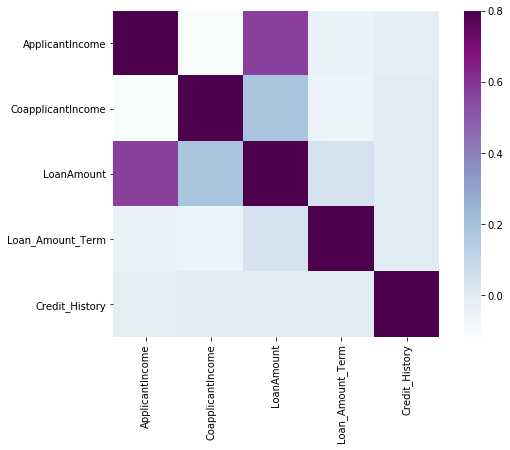

In [43]:
#the correlation between all the numerical variables

matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");
plt.show()

In [44]:
#the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).
# LoanAmount is also correlated with CoapplicantIncome.


In [45]:
#MISSING VALUE AND OUTLIER TREATMENT

In [46]:
print ( train.isnull().sum()) #attribute-wise count of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [47]:
#for categorical variables : impute missing values using mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [48]:
#Finding mode for loan amount term
print ( train['Loan_Amount_Term'].value_counts() )


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [49]:
#Filling null values in Loan amt term attribute with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [52]:
#Loan Amount variable has a lot of outliers.
#It is better to fill missing values in Loan_amt variable with its median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [53]:
#Check if all missing values have been filled

print(train.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [54]:
#All missing values in train dataset have been filled

In [55]:
#Filling missing values in test  dataset

test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

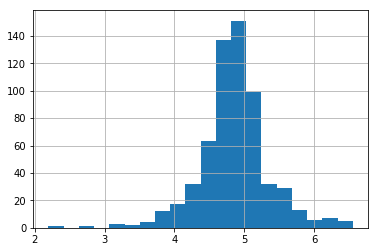

In [56]:
#OUTLIER TREATMENT
#LOG TRANSFORMATION FOR LOAN AMT


train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.show()
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [57]:
#MODEL BUILDING

In [58]:
# drop loan id as it has no effect on the target variable(Loan_Status)

train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [59]:
#Sklearn requires the target variable in a separate dataset.
#  So drop the target variable from the train dataset and save it in another dataset.

X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [60]:
#make dummy variables for the categorical variables

X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [61]:

# next step is to train the model on the training dataset and make predictions for test dataset
#in order to validate these predictions , divide train dataset using test_and_split into train and validation

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [62]:
# import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

/home/harini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
# predicting the Loan_Status for validation set and calculate its accuracy

#predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)
print ("Accuracy:")
print( accuracy_score(y_cv,pred_cv) )


# make predictions for the test dataset.

pred_test = model.predict(test)




Accuracy:
0.8
